#  <center style="color:red">Data Mining Project</center>
#  <center >Tweets Clustering</center>
### <div style="text-align: right">  Réalisé par: Jasser Bayar   3DN1 </div>
# <div style="color:red">Goals:</div>
-  Master Twitter API for tweets extraction
-  Master Natural Language Processing 
-  Data cleaning
-  Tweets classification 


# PART 1: Data extraction using Twitter API
### First step before even creating the notebook is to create a twitter account and request the Twitter API, with which we will extract the necessary number of tweets (10000) thanks to Consumer Key and Access Token.

### Now we can work on our Jupyter Notebook, as you can see we start by importing the necessary librairies  

In [2]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

from IPython.display import display # For plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Then we create a python file in which we put in auth keys that we'll be using to connect to our Twitter API and use an extractor object in fetching the necessary tweets + additional chosen information 

In [4]:

from credentials import *    


def twitter_setup():
   
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

   
    api = tweepy.API(auth)
    return api

In [21]:
# We create an extractor object:
extractor = twitter_setup()

twitter_p = pd.DataFrame(columns = ['tweetID','tweetText','tweetRetweetCt','tweetFavoriteCt','tweetSource','tweetCreated'])
tweets = tweepy.Cursor(extractor.search , q="#",lang="en",since="2020-10-01").items( 100)

# Iterate and print tweets
i=0
for tweet in tweets:
    twitter_p.loc[i,"tweetID"] = tweet.id
    twitter_p.loc[i,"tweetText"] = tweet.text
    twitter_p.loc[i,"tweetRetweetCt"] = tweet.retweet_count
    twitter_p.loc[i,"tweetFavoriteCt"] = tweet.favorite_count
    twitter_p.loc[i,"tweetSource"] = tweet.source
    twitter_p.loc[i,"tweetCreated"] = tweet.created_at
    i+=1

In [18]:
import csv

twitter_p.to_csv('twitter_p4.csv',index = False)
twitter_p.head(20)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated
0,1338548709584408583,RT @Harry_Styles: Fine Line is one year old. I...,149484,0,Twitter for Android,2020-12-14 18:17:36
1,1338548709517369354,@backtojonah yea now u know how i felt when di...,0,0,Twitter for Android,2020-12-14 18:17:36
2,1338548709513195523,RT @Cudalla: aye bro remember to steal food fr...,2269,0,Twitter for iPhone,2020-12-14 18:17:36
3,1338548709513195522,RT @HornyFacts: Sex before bed = Best sleep ever,439,0,Twitter for Android,2020-12-14 18:17:36
4,1338548709508968450,RT @by_10ia: i've never seen winx club https:/...,1874,0,Twitter for iPhone,2020-12-14 18:17:36
5,1338548709492215812,@KassimOdion @Addebayo2 @nnayidavid @bigdaddyv...,0,0,Twitter for Android,2020-12-14 18:17:36
6,1338548709488009216,RT @ShaaayMonique: @shanikkaaa_ thankssss and ...,1,0,Twitter for iPhone,2020-12-14 18:17:36
7,1338548709487996931,RT @gruntvegan: Why #veganism is the future\n\...,2,0,Twitter for iPhone,2020-12-14 18:17:36
8,1338548709483798530,RT @IndySportsOne: Jonathan Taylor and Nyheim ...,11,0,Twitter for Android,2020-12-14 18:17:36
9,1338548709483745280,RT @Louis_Tomlinson: Always in my heart @Harry...,2640979,0,Twitter for iPhone,2020-12-14 18:17:36


### We created multiple csv files and then combined them into one in order to reach 10000 tweets

In [19]:
import glob

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [20]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10847 entries, 0 to 2062
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweetID          10847 non-null  int64 
 1   tweetText        10847 non-null  object
 2   tweetRetweetCt   10847 non-null  int64 
 3   tweetFavoriteCt  10847 non-null  int64 
 4   tweetSource      10840 non-null  object
 5   tweetCreated     10847 non-null  object
dtypes: int64(3), object(3)
memory usage: 593.2+ KB


# PART 2: Tweets Pre-processing
### We will search for unnecessary information thanx to "re" library and get rid of them like punctuation, hashtags,  profile name, URLs and emojis. Then we create our new clean CSV file. 
      

In [10]:
import re  #regular expression
for index, row in combined_csv.iterrows():
    erreur = row['tweetText']
    n0 = re.sub(r"http\S+", "", erreur)
    n1 = re.sub(r"#\S+", "", n0)
    n2 = re.sub(r"@\S+", "", n1)
    n3 = re.sub(r"\n+", "", n2)
    n4 = re.sub(r"RT+", "", n3)
    n5 = re.sub("hhh+", '', n4)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    n6 = re.sub(emoji_pattern, "", n5)
    combined_csv.loc[index,'tweetText'] =n6
   
    

In [23]:
combined_csv.head(20)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated
0,1336738085439201283,RT @MorganBriske: Added these cuties to my Ets...,35,0,Twitter for iPhone,2020-12-09 18:22:49
1,1336738085422460930,"@GrantCMU2018 Don't listen to the haters, driv...",0,0,Twitter for Android,2020-12-09 18:22:49
2,1336738085422460929,TNT has a pool problem but it's not what you t...,0,0,"Cheap Bots, Done Quick!",2020-12-09 18:22:49
3,1336738085384630278,@PurposeTrader20 @seyedoption Oh I wasn’t hold...,0,0,Twitter for iPhone,2020-12-09 18:22:49
4,1336738085380435970,@TheChilledScrub What happened to no simping👀,0,0,Twitter for Android,2020-12-09 18:22:49
5,1336738085376290823,@Mike_Pence @realDonaldTrump Why do you bother...,0,0,Twitter Web App,2020-12-09 18:22:49
6,1336738085376196609,Gooood night moots see y'all in a few days💏💏\n...,0,0,Twitter for Android,2020-12-09 18:22:49
7,1336738085363736582,@shirtNOpantiess Thank youuu❤️❤️ I finally don...,0,0,Twitter for iPhone,2020-12-09 18:22:49
8,1336738085363650566,"@mypublic_affair Nice cock and superfast, very...",0,0,Twitter for iPad,2020-12-09 18:22:49
9,1336738085355352074,You have to own up to your mistakes but if it ...,0,0,Twitter for iPhone,2020-12-09 18:22:49


In [12]:
combined_csv.to_csv('clean_combined_csv.csv',index = False)

# Part 3: Tweets Processing
### In order to process our tweets, we'll need NLTK library that will provide us with two important tools in this phase, stopwords and PorterStemmer to eliminate unnecessary words with the help of Tokenization

In [13]:
import nltk 
nltk.download('stopwords' )

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasse\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
clean_data=pd.read_csv('clean_combined_csv.csv')
clean_data.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated
0,1336738085439201283,THREAD OF HINTS/TEASES OF APRIL O'NEIL BECOM...,35,0,Twitter for iPhone,2020-12-09 18:22:49
1,1336738085422460930,it still hits,0,0,Twitter for Android,2020-12-09 18:22:49
2,1336738085422460929,Hard same,0,0,"Cheap Bots, Done Quick!",2020-12-09 18:22:49
3,1336738085384630278,weverse ss were all over tl,0,0,Twitter for iPhone,2020-12-09 18:22:49
4,1336738085380435970,Behalf of All Thalapathy Fans Requesting to...,0,0,Twitter for Android,2020-12-09 18:22:49


In [4]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer() 
stemed_dataset=[]

for i in range(0,clean_data.shape[0]):
    
    
    stemmed_array=clean_data['tweetText'][i].split()
    stemmed=[ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmed=' '.join(stemmed)
    stemed_dataset.append(stemmed)
print(stemed_dataset[0:20])

["thread OF hints/teas OF april o'neil becom A new repoer IN the futur", 'still hit', 'hard', 'wevers ss tl', "behalf all thalapathi fan request give updat thalapathi 's nanbar ajith…", 'ah, yes, definetli', 'thank u much', 'weird scary.. cursedt.../hj', '', 'nobel prize winner inventor pcr test knew fauci fraud year ago. thi 2 min video scath rebuk F…', 'let’', 'high-qual person develop content prepar success peopl bullsh*t, effect wisdom…', '"ani attempt u.s. iran tinker – let alon fundament alter – term deal would dangerou…', 'scene kpop mv abl top one', 'the use covid-19 fear', 'So anyway mathew playoff series...', "it' ex still ride past da hous", 'live now!! come ch…', 'the peopl go benefit brexit alreadi made money. they bail loot ca…', 'know offici someon don’t twatch']


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(stemed_dataset)
print(X)

  (0, 4862)	1
  (0, 3502)	2
  (0, 2415)	1
  (0, 4781)	1
  (0, 437)	1
  (0, 3388)	1
  (0, 616)	1
  (0, 3401)	1
  (0, 4087)	1
  (0, 2565)	1
  (0, 4825)	1
  (0, 2072)	1
  (1, 4623)	1
  (1, 2419)	1
  (2, 2323)	1
  (3, 5253)	1
  (3, 4590)	1
  (3, 4899)	1
  (4, 629)	1
  (4, 320)	1
  (4, 4818)	2
  (4, 1857)	1
  (4, 4098)	1
  (4, 2153)	1
  (4, 5085)	1
  :	:
  (10880, 2154)	1
  (10880, 2043)	1
  (10880, 3616)	1
  (10880, 3898)	1
  (10880, 1890)	1
  (10880, 1155)	1
  (10881, 2892)	1
  (10881, 2259)	1
  (10881, 4450)	1
  (10881, 65)	1
  (10881, 509)	1
  (10882, 2668)	1
  (10882, 4903)	1
  (10882, 4478)	1
  (10882, 5376)	1
  (10882, 959)	1
  (10883, 4825)	1
  (10883, 255)	1
  (10883, 627)	1
  (10884, 3677)	1
  (10884, 5340)	1
  (10884, 2317)	1
  (10884, 5275)	1
  (10884, 701)	1
  (10884, 1888)	1


# PART 4: Tweets Classification
### In this phase we will be using KMeans from scikit-learn library in order to perform clustering. We also need to calculate wcss and use the elbow method to fix the optimal number of clusters in a 1 to 30 range

In [6]:
from sklearn.cluster import KMeans
wcss=[]  #Within-Cluster-Sum-of-Squares (WCSS)
for i in range(1,30):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

Initialization complete
Iteration 0, inertia 178489.0
Iteration 1, inertia 80600.67211759262
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 135531.0
Iteration 1, inertia 80600.67211759262
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 91579.0
Iteration 1, inertia 80600.67211759262
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 325005.0
Iteration 1, inertia 80600.67211759262
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 199361.0
Iteration 1, inertia 80600.67211759262
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 146040.0
Iteration 1, inertia 80600.67211759262
Converged at iteration 1: ce

Iteration 0, inertia 113090.0
Iteration 1, inertia 80131.85805524833
Iteration 2, inertia 80108.21988715992
Converged at iteration 2: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 81069.0
Iteration 1, inertia 80472.7811838356
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 91354.0
Iteration 1, inertia 80183.65608079442
Iteration 2, inertia 80177.65324354482
Iteration 3, inertia 80155.97743783439
Iteration 4, inertia 80088.23774576109
Iteration 5, inertia 79882.98869553415
Iteration 6, inertia 79308.53793708712
Iteration 7, inertia 79189.50742014141
Iteration 8, inertia 79141.06779692926
Iteration 9, inertia 79137.08471018267
Converged at iteration 9: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 113301.0
Iteration 1, inertia 80095.64464128665
Iteration 2, inertia 79882.85471589457
Iteration 3, ine

Iteration 1, inertia 80036.3297818992
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 91075.0
Iteration 1, inertia 80126.84837578388
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 90971.0
Iteration 1, inertia 80020.81133895583
Iteration 2, inertia 79978.45981976013
Iteration 3, inertia 79866.11703646906
Iteration 4, inertia 79856.9486282127
Converged at iteration 4: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 91600.0
Iteration 1, inertia 80097.6641009157
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 91297.0
Iteration 1, inertia 79603.48553695266
Iteration 2, inertia 79467.93873346258
Iteration 3, inertia 79417.00030596263
Iteration 4, inertia 79342.38998894813
Iteration 5, inertia 79041.780

Iteration 0, inertia 102384.0
Iteration 1, inertia 79997.25987391628
Iteration 2, inertia 79993.42509865983
Iteration 3, inertia 79931.19547252213
Iteration 4, inertia 79602.32598638689
Iteration 5, inertia 79591.98566399727
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 100017.0
Iteration 1, inertia 79008.76934679894
Iteration 2, inertia 78933.43131449084
Iteration 3, inertia 78920.63381339352
Iteration 4, inertia 78911.96819294493
Iteration 5, inertia 78903.13781378981
Iteration 6, inertia 78810.54427349946
Iteration 7, inertia 78467.80399981137
Iteration 8, inertia 78462.99812333494
Converged at iteration 8: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 91558.0
Iteration 1, inertia 79705.1179986549
Iteration 2, inertia 79610.61537714
Iteration 3, inertia 79601.67676641971
Converged at iteration 3: center shift 0.0 within tolerance 1.357921711708262

Iteration 0, inertia 90418.0
Iteration 1, inertia 79438.13590358722
Iteration 2, inertia 79423.78524351912
Converged at iteration 2: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 101466.0
Iteration 1, inertia 79257.32748666203
Iteration 2, inertia 79241.37641681245
Iteration 3, inertia 79223.52190061232
Iteration 4, inertia 79130.52212502781
Iteration 5, inertia 78934.63125175597
Iteration 6, inertia 78906.13645486273
Iteration 7, inertia 78872.69653884156
Converged at iteration 7: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 99745.0
Iteration 1, inertia 78065.90668169937
Iteration 2, inertia 77990.34367412298
Iteration 3, inertia 77978.96424143482
Iteration 4, inertia 77909.67173710382
Iteration 5, inertia 77731.39091944216
Iteration 6, inertia 77723.56736729064
Converged at iteration 6: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iterat

Initialization complete
Iteration 0, inertia 79869.0
Iteration 1, inertia 79277.37609058907
Converged at iteration 1: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 90393.0
Iteration 1, inertia 79275.19927550387
Iteration 2, inertia 79269.18625881743
Iteration 3, inertia 79247.5986766653
Iteration 4, inertia 79180.02439101195
Iteration 5, inertia 78975.35208491435
Iteration 6, inertia 78414.1897764524
Iteration 7, inertia 78283.92970250512
Iteration 8, inertia 78240.61891068147
Iteration 9, inertia 78229.12383341296
Converged at iteration 9: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 101797.0
Iteration 1, inertia 79525.9637368306
Iteration 2, inertia 79522.14869586853
Iteration 3, inertia 79460.2136667731
Iteration 4, inertia 79130.42972270667
Iteration 5, inertia 79120.83969921463
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initializa

Iteration 1, inertia 78137.72885689816
Iteration 2, inertia 78056.50245117518
Iteration 3, inertia 78044.63204717677
Iteration 4, inertia 78036.31679313962
Iteration 5, inertia 78018.74137358581
Iteration 6, inertia 77836.50124839027
Iteration 7, inertia 77625.23879372916
Converged at iteration 7: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 90527.0
Iteration 1, inertia 78622.26691569685
Iteration 2, inertia 78522.14642670259
Iteration 3, inertia 78515.26895746417
Iteration 4, inertia 78511.43933039493
Iteration 5, inertia 78508.11093824726
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 89913.0
Iteration 1, inertia 78893.7090558159
Iteration 2, inertia 78806.26032857446
Iteration 3, inertia 78477.44248552596
Iteration 4, inertia 78430.06166160811
Converged at iteration 4: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complet

Initialization complete
Iteration 0, inertia 89898.0
Iteration 1, inertia 78089.4196934635
Iteration 2, inertia 78049.38814842187
Iteration 3, inertia 78022.94416158213
Iteration 4, inertia 77929.6182878768
Iteration 5, inertia 77737.48524812635
Iteration 6, inertia 77717.52365644251
Iteration 7, inertia 77684.05451299321
Converged at iteration 7: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 89007.0
Iteration 1, inertia 77181.86608885841
Iteration 2, inertia 77055.98883905806
Iteration 3, inertia 77022.33472125232
Iteration 4, inertia 76736.40971250569
Iteration 5, inertia 76418.7923791172
Iteration 6, inertia 76407.74559890176
Iteration 7, inertia 76403.33168706573
Converged at iteration 7: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 88925.0
Iteration 1, inertia 77623.72694319946
Iteration 2, inertia 77588.539983067
Iteration 3, inertia 77564.70913418983
Iteration 4, iner

Iteration 3, inertia 77452.3870201044
Iteration 4, inertia 77443.31069845805
Iteration 5, inertia 77440.88188009267
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 98535.0
Iteration 1, inertia 76851.78663908693
Iteration 2, inertia 76792.26982197429
Iteration 3, inertia 76727.92730614488
Iteration 4, inertia 76654.15059210808
Iteration 5, inertia 76638.18750121912
Iteration 6, inertia 76630.86825827112
Iteration 7, inertia 76624.73621100251
Iteration 8, inertia 76623.28496719571
Converged at iteration 8: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 78305.0
Iteration 1, inertia 77544.92151856153
Iteration 2, inertia 77525.79125928583
Iteration 3, inertia 77466.58422570821
Iteration 4, inertia 77346.07571482005
Iteration 5, inertia 77344.45114932173
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complet

Initialization complete
Iteration 0, inertia 89193.0
Iteration 1, inertia 77415.09889636085
Iteration 2, inertia 77329.795652551
Iteration 3, inertia 77318.20005683143
Iteration 4, inertia 77309.12326341237
Iteration 5, inertia 77306.69443649425
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 98310.0
Iteration 1, inertia 76647.8340126794
Iteration 2, inertia 76588.32426528506
Iteration 3, inertia 76523.96973935634
Iteration 4, inertia 76450.18766088136
Iteration 5, inertia 76434.22252667908
Iteration 6, inertia 76426.9026645519
Iteration 7, inertia 76420.77014938087
Iteration 8, inertia 76419.31889502468
Converged at iteration 8: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 78130.0
Iteration 1, inertia 77371.07983020248
Iteration 2, inertia 77351.9241884017
Iteration 3, inertia 77285.18840077629
Iteration 4, inertia 77178.02899684531
Iteration 5, iner

Initialization complete
Iteration 0, inertia 89063.0
Iteration 1, inertia 77264.25112866011
Iteration 2, inertia 77178.67748758843
Iteration 3, inertia 77167.07369183683
Iteration 4, inertia 77157.9946885643
Iteration 5, inertia 77155.56580984018
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 98010.0
Iteration 1, inertia 76456.63218325363
Iteration 2, inertia 76392.48801226426
Iteration 3, inertia 76325.91697065296
Iteration 4, inertia 76254.6488819998
Iteration 5, inertia 76238.58532927441
Iteration 6, inertia 76231.26262169251
Iteration 7, inertia 76225.13320954432
Iteration 8, inertia 76223.68175316724
Converged at iteration 8: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 77965.0
Iteration 1, inertia 77207.14795134905
Iteration 2, inertia 77187.99709511489
Iteration 3, inertia 77121.26785535413
Iteration 4, inertia 77014.10522421493
Iteration 5, i

Initialization complete
Iteration 0, inertia 97529.0
Iteration 1, inertia 76176.1017602504
Iteration 2, inertia 76128.96225220435
Iteration 3, inertia 76118.19677267982
Iteration 4, inertia 76104.15913635818
Iteration 5, inertia 76100.61539313469
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 77465.0
Iteration 1, inertia 76708.5274806364
Iteration 2, inertia 76689.38734409699
Iteration 3, inertia 76622.68195586102
Iteration 4, inertia 76515.51626062367
Iteration 5, inertia 76513.86110852819
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 87744.0
Iteration 1, inertia 76183.94014535971
Iteration 2, inertia 76145.50236607897
Iteration 3, inertia 76030.36118985235
Iteration 4, inertia 75548.75075733945
Iteration 5, inertia 75359.75687061685
Iteration 6, inertia 75324.64136765622
Iteration 7, inertia 75319.86155710663
Iteration 8, i

Iteration 5, inertia 75798.57248108054
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 77325.0
Iteration 1, inertia 76569.41150408817
Iteration 2, inertia 76550.27477375878
Iteration 3, inertia 76492.03016209396
Iteration 4, inertia 76376.40495370164
Iteration 5, inertia 76374.74976423674
Converged at iteration 5: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 87577.0
Iteration 1, inertia 76027.59758831572
Iteration 2, inertia 75989.15196730947
Iteration 3, inertia 75874.06377665959
Iteration 4, inertia 75392.46331315445
Iteration 5, inertia 75203.4672847287
Iteration 6, inertia 75168.35349409773
Iteration 7, inertia 75163.57072631211
Iteration 8, inertia 75154.88954991779
Iteration 9, inertia 75152.30960287491
Converged at iteration 9: center shift 0.0 within tolerance 1.3579217117082628e-07
Initialization complete
Iteration 0, inertia 78619.0
Iteratio

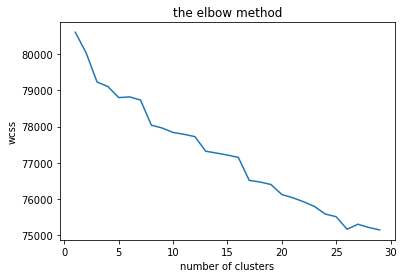

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

### Once we fixed clusters number, we can let KMeans do its job and display the differnet clusters

In [9]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)

KMeans(n_clusters=30, n_init=1)

In [10]:
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
 two
 yesterday
 sinc
 pound
 propos
 remaining
 hours
 democrat
 aid
 space

Cluster 1:
 man
 that
 get
 let
 my
 don
 want
 even
 everi
 im

Cluster 2:
 pleas
 album
 rt
 taylor
 earli
 on
 thi
 ok
 leav
 god

Cluster 3:
 think
 it
 plus
 about
 kind
 way
 bizarr
 don
 fun
 realist

Cluster 4:
 hard
 want
 day
 feel
 open
 like
 and
 you
 anywher
 parti

Cluster 5:
 do
 get
 what
 want
 you
 it
 help
 the
 make
 sure

Cluster 6:
 check
 stimulu
 like
 000
 billionair
 us
 new
 closet
 poshmark
 ad

Cluster 7:
 im
 sorri
 late
 talabat
 order
 to
 sorrylik
 dumbest
 ha
 be

Cluster 8:
 it
 like
 the
 you
 love
 get
 time
 one
 go
 year

Cluster 9:
 album
 sister
 tonight
 record
 eastern
 studio
 midnight
 tell
 elat
 folklore

Cluster 10:
 my
 yoonbin
 happi
 best
 rapperyou
 rapper
 birthday
 trendi
 love
 alway

Cluster 11:
 you
 the
 that
 thing
 on
 watch
 they
 next
 14
 still

Cluster 12:
 bramh
 mantra
 om
 recit
 about
 lok
 worship
 the
 goe

In [12]:
twitter_clusters = pd.DataFrame(columns = [ 'tweetText'])
i=0
j=0
while i<30:
    while True: 
        Y=cv.transform([stemed_dataset[j]])
        prediction=Kmeans.predict(Y)
        if i == prediction:
            print("tweet of cluster "+str(prediction)+clean_data.loc[j,"tweetText"])
            twitter_clusters.loc[i,"tweetText"] =clean_data.loc[j,"tweetText"]
            j=0
            break
        j+=1
    i+=1
twitter_clusters.to_csv('twitter_clusters.csv',index = False )

tweet of cluster [0]i’m down over two pounds since yesterday
tweet of cluster [1]  Are you sure about that? Oh, I am a well grown up man...don't you go worrying about that..… 
tweet of cluster [2]  ok leaving early tomorrow to road trip to the middle of nowhere so if taylor swift drops another album please contact me via…
tweet of cluster [3] I don’t think it’s realistic in any way, but it’s kind of fun to think about. Plus, after that bizarre Q… 
tweet of cluster [4]  “And it's hard to be at a party when I feel like an open wound, it's hard to anywhere these days when all I want is you.” h…
tweet of cluster [5]  Do that. What a grand idea. Better yet why not move there and flood the states with New… 
tweet of cluster [6]Check out what I just added to my closet on Poshmark: Roots coral-pink velour short-sleeved hoodie.… 
tweet of cluster [7]TALABAT HAS TO BE THE DUMBEST SHIT EVER when our order is late : im sorry im sorry im sorry im sorry im sorrylike wtffffff
tweet of cluster [8]  TH

# <center style="color:red">Conclusion</center>


### <center >It is amazing what you can extract and deduct from simple words typed by ordinary people thanx to data mining and python with its vast and resourceful libraries. These information can help us make very sensitive decisions with very low risk in different fields depending on our needs.</center>